In [1]:
import pandas as pd
import numpy as np

In [2]:
datapath = "dataset/"

df = pd.read_csv(datapath + 'data.csv')

In [3]:
df.head()

,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hfouls,afouls,hsaves,asaves,label
0,24,76,2,4,14,17,11,13,2,1,2
1,80,20,3,1,5,2,1,3,0,1,1
2,57,43,4,2,12,11,10,12,1,2,1
3,47,53,5,3,13,11,7,10,1,3,0
4,72,28,5,4,21,6,8,13,4,5,0


In [4]:
df.shape

(1272, 11)

In [5]:
df.columns

Index(['hPossesion', 'aPossesion', 'hshotsOnTarget', 'ashotsOnTarget',
       'hshots', 'ashots', 'hfouls', 'afouls', 'hsaves', 'asaves', 'label'],
      dtype='object')

In [12]:
df.dtypes

hPossesion        int64
aPossesion        int64
hshotsOnTarget    int64
ashotsOnTarget    int64
hshots            int64
ashots            int64
hfouls            int64
afouls            int64
hsaves            int64
asaves            int64
label             int64
dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:

X = df.drop(columns=['label'])  
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear')  

svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [17]:

class MultiClassSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.classes = None
        self.weights = None
        self.biases = None

    def _hinge_loss_gradient(self, X, y, w, b):
        n_samples = X.shape[0]
        distances = 1 - y * (np.dot(X, w) + b)
        dw = np.zeros_like(w)
        db = 0

        for i in range(n_samples):
            if distances[i] > 0:
                dw -= y[i] * X[i]
                db -= y[i]
        dw = dw / n_samples + self.lambda_param * w
        db = db / n_samples
        return dw, db

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.weights = np.zeros((n_classes, n_features))
        self.biases = np.zeros(n_classes)

        for idx, cls in enumerate(self.classes):
            y_binary = np.where(y == cls, 1, -1)
            w = np.zeros(n_features)
            b = 0

            for _ in range(self.n_iters):
                dw, db = self._hinge_loss_gradient(X, y_binary, w, b)
                w -= self.lr * dw
                b -= self.lr * db

            self.weights[idx] = w
            self.biases[idx] = b

    def predict(self, X):
        scores = np.dot(X, self.weights.T) + self.biases
        predictions = np.argmax(scores, axis=1)
        return self.classes[predictions]


In [19]:
model = MultiClassSVM()
model.fit(X_train.to_numpy(), y_train.to_numpy())
predictions = model.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


In [ ]:
import matplotlib.pyplot as plt


def plot_decision_boundaries(model, X, y):
    h = 0.01  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundaries")
    plt.show()


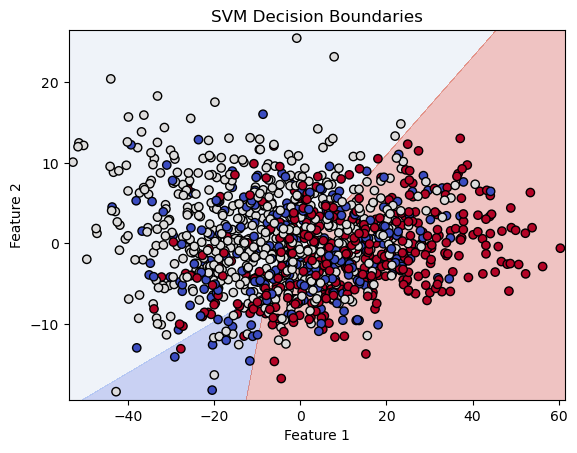

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
model.fit(X_reduced, y)
plot_decision_boundaries(model, X_reduced, y)
